In [43]:
import numpy as np
#import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
from pylcp.gratings import (maskedGaussianGratingMOTBeams,
                            infiniteGratingMOTBeams)
import cProfile, pstats, io

### Let's plot up the intensity profiles at various z:

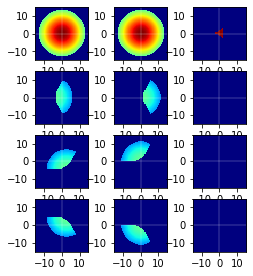

In [44]:
zchip = 1.0
nr=3
testBeams = maskedGaussianGratingMOTBeams(
    delta=-1., s=1., nr=nr, thd=np.pi/4,
    pol=np.array([-1/np.sqrt(2), 1j/np.sqrt(2), 0]),
    reflected_pol=np.array([np.pi, 0]),
    reflected_pol_basis='poincare', eta=None, eta0=None,
    wb=21.0, rs=13.0, center_hole=1.5,
    outer_radius=11.0, zgrating=zchip, grating_angle=0
)

# Trigger numba to compile the beta code:
testBeams.beam_vector[0].beta()
testBeams.beam_vector[1].beta()

x_beta = 15
X, Y = np.meshgrid(np.linspace(-x_beta, x_beta, 101),
                   np.linspace(-x_beta, x_beta, 101))
z_tests = [zchip-5, zchip-1e-9, zchip+5]

plt.figure("Laser Beams", figsize=(4, 1.5*nr))
plt.clf()
pr = cProfile.Profile()

for jj, laserBeam in enumerate(testBeams.beam_vector):
    for ii, z_test in enumerate(z_tests):
        Z = z_test*np.ones(X.shape)
        it = np.nditer([X, Y, Z, None])
        Rt=np.array([X, Y, Z])

        """pr.enable()
        for (x, y, z, beta) in it:
            beta[...] = laserBeam.beta(np.array([x, y, z]), 0.)
        pr.disable()
        
        BETA = it.operands[3]"""
        
        pr.enable()
        BETA = laserBeam.beta(Rt)
        pr.disable()
        
        plt.subplot(len(testBeams.beam_vector), len(z_tests), jj*len(z_tests)+ii+1)
        plt.imshow(BETA, origin='lower',
                   extent=(-x_beta, x_beta,
                           -x_beta, x_beta))
        plt.clim((0, 1))
        plt.set_cmap('jet')
        # Make a cross-hair:
        plt.plot([0, 0], [-x_beta, x_beta],
                 'w-', linewidth=0.25)
        plt.plot([-x_beta, x_beta], [0, 0],
                 'w-', linewidth=0.25)

Print out performance specs:

In [45]:
s = io.StringIO()
sortby = 'cumtime'
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

         126 function calls in 0.006 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        9    0.001    0.000    0.005    0.001 /Users/steve/GitHub/packages/pylcp/gratings.py:402(beta)
        9    0.003    0.000    0.003    0.000 /Users/steve/GitHub/packages/pylcp/gratings.py:365(mask)
        3    0.001    0.000    0.001    0.000 /Users/steve/GitHub/packages/pylcp/gratings.py:276(beta)
        9    0.001    0.000    0.001    0.000 /Users/steve/GitHub/packages/pylcp/gratings.py:353(back_project)
        9    0.000    0.000    0.000    0.000 {built-in method numpy.array}
       12    0.000    0.000    0.000    0.000 {method 'astype' of 'numpy.ndarray' objects}
       12    0.000    0.000    0.000    0.000 /Users/steve/opt/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:159(ones)
       12    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(copyto)
       12    0.000    0.000    0.000    0.0

### Now, let's try to plot it up along one axis:

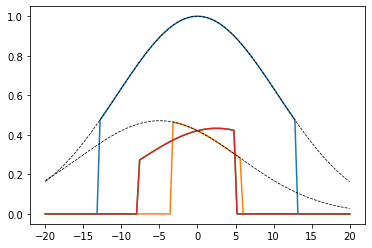

In [46]:
x = np.linspace(-20, 20, 101)
y = np.zeros(x.shape)
z = (zchip - 5.)*np.ones(x.shape)

beta = testBeams.beta( np.array([x, y, z]))

fig, ax = plt.subplots(1, 1)
ax.plot(x, beta.T)
ax.plot(x, np.exp(-2*x**2/21**2), 'k--', linewidth=0.75)
#ax.plot(x, 0.33/np.cos(np.pi/4)*np.exp(-2*(x-5.*np.sin(np.pi/3))**2/21**2), '--')
ax.plot(x, 1./3./np.cos(np.pi/4)*np.exp(-2*(x+5.)**2/21**2), 'k--', linewidth=0.75)

[0. 0. 1.]
[-0.70710678 -0.         -0.70710678]
[ 0.35355339 -0.61237244 -0.70710678]
[ 0.35355339  0.61237244 -0.70710678]


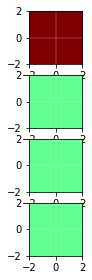

In [38]:
nr=3
testBeams = infiniteGratingMOTBeams(delta=-1., s=1., nr=nr, thd=np.pi/4,
                                    pol=np.array([-1/np.sqrt(2), 1j/np.sqrt(2), 0]),
                                    reflected_pol=np.array([np.pi, 0]),
                                    reflected_pol_basis='poincare',
                                    eta=None,
                                    grating_angle=0)
x_beta = 2
X, Y = np.meshgrid(np.linspace(-x_beta, x_beta, 101),
                   np.linspace(-x_beta, x_beta, 101))
z_tests = [0]

plt.figure("Infinite Beams", figsize=(4, 1.5*nr))
plt.clf()
for jj, laserBeam in enumerate(testBeams.beam_vector):
    for ii, z_test in enumerate(z_tests):
        plt.subplot(len(testBeams.beam_vector), len(z_tests), jj*len(z_tests)+ii+1)
        Rt=np.array([X, Y, z_test*np.ones(X.shape)])
        tt=np.zeros(X.shape)
        print(laserBeam.kvec())
        plt.imshow(laserBeam.beta(R=Rt,t=tt),
                   origin='lower',
                   extent=(-x_beta, x_beta,
                           -x_beta, x_beta))
        plt.clim((0, 1))
        plt.set_cmap('jet')
        # Make a cross-hair:
        plt.plot([0, 0], [-x_beta, x_beta],
                 'w-', linewidth=0.25)
        plt.plot([-x_beta, x_beta], [0, 0],
                 'w-', linewidth=0.25)

In [41]:
print(testBeams.beta(), 1/3/np.cos(np.pi/4))

[1.         0.47140452 0.47140452 0.47140452] 0.4714045207910316
